In [1]:
import scipy
print('scipy: {}'.format(scipy.__version__)) # numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib


import matplotlib 
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__)) # pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
#scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import xlrd

from sklearn.svm import LinearSVR
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso, Ridge  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFE
from sklearn import cross_validation
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection #might be model_selection <--- this is the new one
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import Normalizer
import xgboost as xgb

sns.set_style("whitegrid")
%matplotlib inline

scipy: 1.0.0
numpy: 1.12.1
matplotlib: 2.1.0
pandas: 0.21.0
sklearn: 0.19.1


C:\Users\j_coo\Anaconda2new\envs\trozziwork\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [123]:
data = pd.read_excel('ATTENDEEISSA2017NumericalExcelCleaned.xlsx', header = 0)
#data_antendees = pd.read_excel('HW3Data.xlsx', sheetname = 'trainY')

In [124]:
#data_a, data_b = train_test_split(data, test_size=0.2, random_state = 7)

In [125]:
data.shape

(760, 165)

In [126]:
data_a = data.apply(pd.to_numeric, errors='ignore')    #changes dataframe dtypes to their lowest

In [127]:
data_a.shape

(760, 165)

In [128]:
cols = list(data_a)    # THIS DROPS ALL COLUMNS THAT HAVE THE SAME VALUE
nunique = data_a.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
data_a = data_a.drop(cols_to_drop, axis=1)

In [129]:
data_a.shape

(760, 156)

In [26]:
#data_a = data_a.loc[: , ~data_a.columns.duplicated()]#i think this is only column name

In [130]:
data_a = data_a.T.drop_duplicates().T

In [131]:
data_a.shape

(760, 148)

In [132]:
data_a = data_a.dropna(axis=1, how='all')

In [133]:
data_a = data_a.dropna(axis=0, how='all')

In [134]:
data_a.shape

(760, 147)

In [117]:
for a in range(0, len(data_a.columns)):
    print a, data_a.columns[a]

0 Ability to meet peers
1 ARCSI Evening Receptions
2 ARCSI Rountables
3 Are you a member of a distributor marketing group? If yes, please list which one in the comments box.
4 ARSCI Roundtables
5 Booth visits to a new exhibitor or supplier:
6 Co-located events by other associations
7 Comments
8 Commercial Cleaning Business Solutions Track
9 Customers met with
10 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?
11 Did you accomplish all you had planned during the trade show? 
12 Did you attend any educational sessions offered through ISSA Convention?
13 Education session topics
14 Educational sessions
15 Educational/Professional Development
16 Email
17 Email.1
18 End Date
19 Evening Roundtable event
20 Find new ideas to solve problems
21 Find new suppliers
22 First Name
23 First-Time Attendee Orientation
24 Free WiFi hot spots
25 Green Clean Schools Track
26 Healthcare Environment Essentials Track
27 Hotel/Host city
28 How did you 

In [141]:
sum_happy = []
for a in range(0,len(data_a.iloc[:,36])):
    if data_a.iloc[a,36] == 5 or data_a.iloc[a,36]==4:
        sum_happy.append(3)
    elif data_a.iloc[a,36] == 3:
        sum_happy.append(2)
    elif data_a.iloc[a,36] ==2 or data_a.iloc[a,36]==1:
        sum_happy.append(1)

        

In [142]:
data_a['sum_happy'] = sum_happy

In [137]:
data_a.shape

(760, 147)

In [66]:
data_a.dtypes

Ability to meet peers                                                                                                              object
ARCSI Evening Receptions                                                                                                           object
ARCSI Rountables                                                                                                                   object
Are you a member of a distributor marketing group? If yes, please list which one in the comments box.                              object
ARSCI Roundtables                                                                                                                  object
Booth visits to a new exhibitor or supplier:                                                                                       object
Co-located events by other associations                                                                                            object
Comments                          

In [139]:
data_a = data_a.apply(pd.to_numeric, errors='ignore') 

In [90]:
data_a.dtypes

Ability to meet peers                                                                                                              float64
ARCSI Evening Receptions                                                                                                           float64
ARCSI Rountables                                                                                                                   float64
Are you a member of a distributor marketing group? If yes, please list which one in the comments box.                              float64
ARSCI Roundtables                                                                                                                  float64
Booth visits to a new exhibitor or supplier:                                                                                       float64
Co-located events by other associations                                                                                            float64
Comments                   

In [143]:
corr = data_a.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:].corr()


In [35]:
testcorr = corr.dropna(axis=1, how='all')

In [ ]:
testcorr = testcorr.dropna(axis=0, how='all')

In [144]:
plt.figure(figsize=(150, 150))
sns.heatmap(testcorr,vmin=-1, vmax=1, square=True)

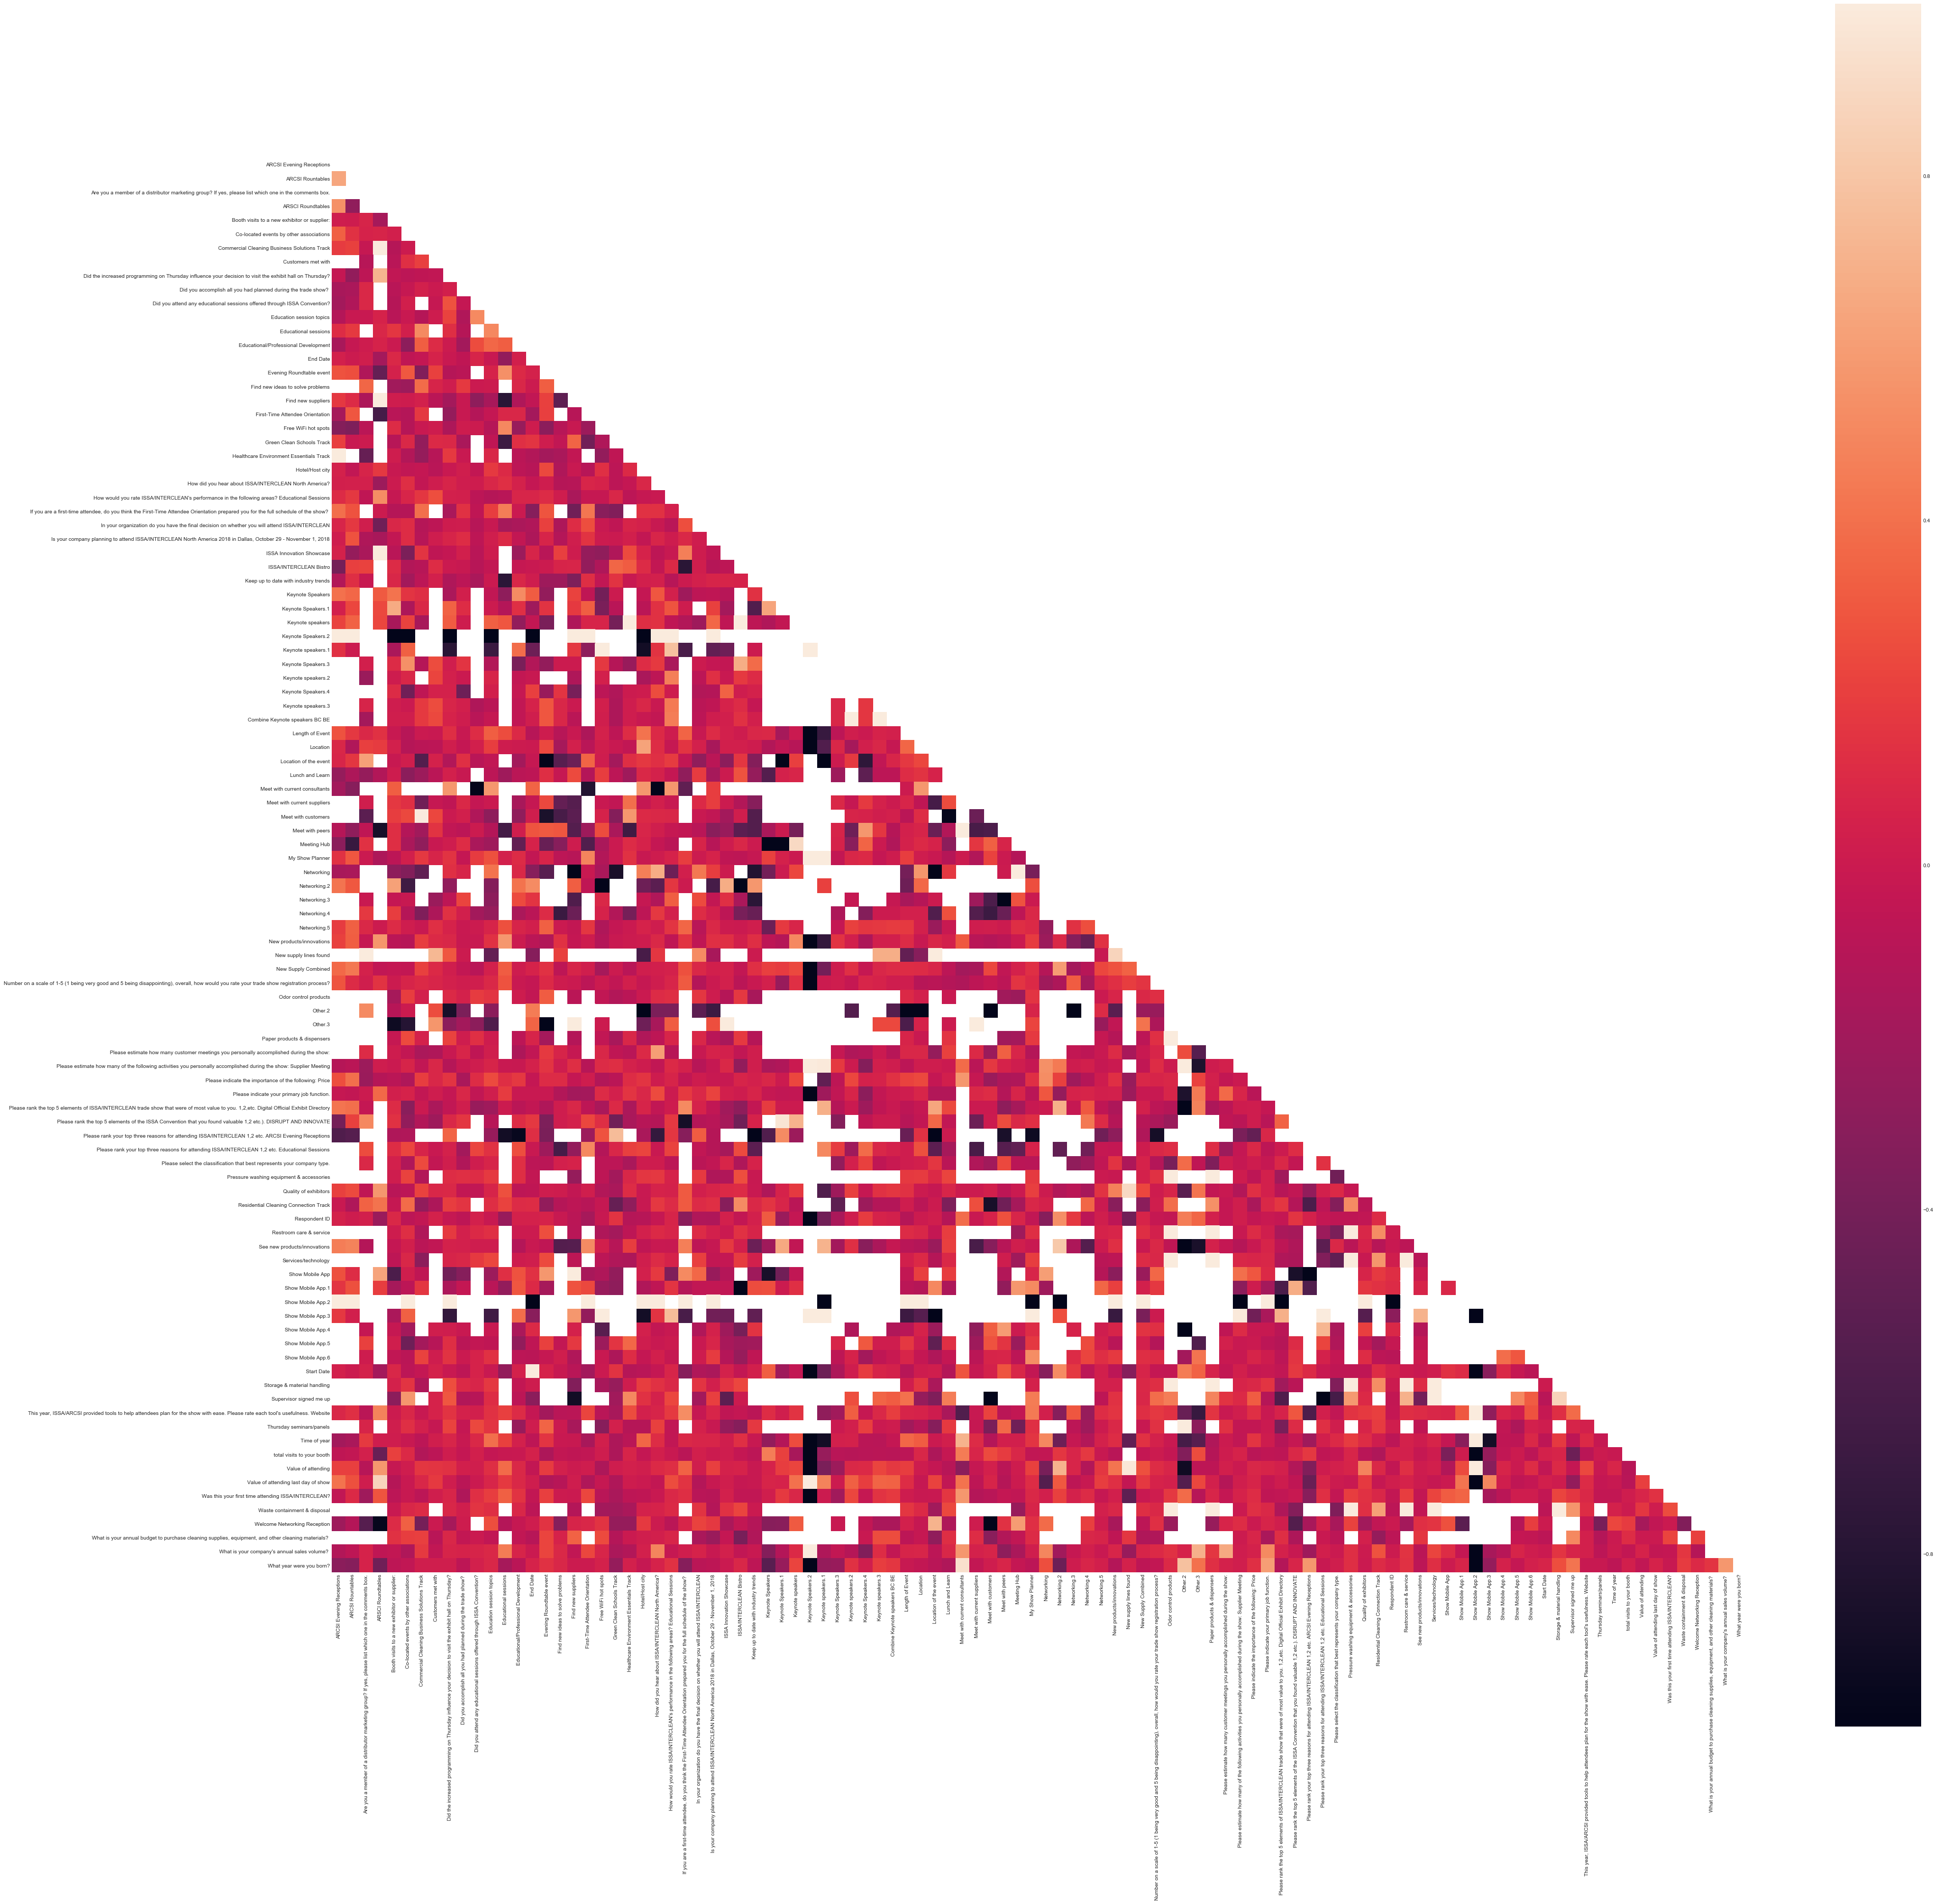

In [145]:
mask = np.zeros_like(testcorr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(testcorr, mask=mask, vmin = -1, vmax=1, square=True)

In [ ]:
testcorr = data_a.iloc[:,26:73]
plt.figure(figsize=(150, 150))
sns.heatmap(testcorr,vmin=-1, vmax=1, square=True)

In [ ]:
plt.figure(figsize=(60, 60))
sns.heatmap(testcorr,vmin=-1, vmax=1, square=True)

In [ ]:
corr

In [39]:
for a in range(0, len(data_a.columns)):
    print a, data_a.columns[a]

0 Ability to meet peers
1 ARCSI Evening Receptions
2 ARCSI Rountables
3 Are you a member of a distributor marketing group? If yes, please list which one in the comments box.
4 ARSCI Roundtables
5 Booth visits to a new exhibitor or supplier:
6 Co-located events by other associations
7 Comments
8 Commercial Cleaning Business Solutions Track
9 Customers met with
10 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?
11 Did you accomplish all you had planned during the trade show? 
12 Did you attend any educational sessions offered through ISSA Convention?
13 Education session topics
14 Educational sessions
15 Educational/Professional Development
16 Email
17 Email.1
18 End Date
19 Evening Roundtable event
20 Find new ideas to solve problems
21 Find new suppliers
22 First Name
23 First-Time Attendee Orientation
24 Free WiFi hot spots
25 Green Clean Schools Track
26 Healthcare Environment Essentials Track
27 Hotel/Host city
28 How did you 

In [140]:
data_a = data_a[np.isfinite(data_a['Is your company planning to attend ISSA/INTERCLEAN North America 2018 in Dallas, October 29 - November 1, 2018'])] #drop rows that dont have company planning to attend

In [92]:
data_a.shape

(513, 147)

In [156]:
data_Y = data_a['sum_happy']

In [147]:
data_X = data_a

In [148]:
data_X = data_X.drop(['Is your company planning to attend ISSA/INTERCLEAN North America 2018 in Dallas, October 29 - November 1, 2018'],axis = 1)

In [157]:
data_X = data_X.drop(['sum_happy'],axis=1)

In [158]:
data_X.shape

(513, 101)

In [105]:
for a in range(0, len(data_X.columns)):
    print a, data_X.columns[a]

0 Ability to meet peers
1 ARCSI Evening Receptions
2 ARCSI Rountables
3 Are you a member of a distributor marketing group? If yes, please list which one in the comments box.
4 ARSCI Roundtables
5 Booth visits to a new exhibitor or supplier:
6 Co-located events by other associations
7 Comments
8 Commercial Cleaning Business Solutions Track
9 Customers met with
10 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?
11 Did you accomplish all you had planned during the trade show? 
12 Did you attend any educational sessions offered through ISSA Convention?
13 Education session topics
14 Educational sessions
15 Educational/Professional Development
16 Email
17 Email.1
18 End Date
19 Evening Roundtable event
20 Find new ideas to solve problems
21 Find new suppliers
22 First Name
23 First-Time Attendee Orientation
24 Free WiFi hot spots
25 Green Clean Schools Track
26 Healthcare Environment Essentials Track
27 Hotel/Host city
28 How did you 

In [159]:
data_X = data_X.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:]

In [160]:
data_X = data_X.astype(float)

In [161]:
data_Y = data_Y.astype(float)

In [162]:

data_X_hold = data_X.columns
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
imp.fit(data_X)
data_T=imp.transform(data_X)
data_X = pd.DataFrame(data_T, columns = data_X_hold)

In [ ]:
scaler = Normalizer().fit(data_X)   # always want to save the value you returned
normalizedX = scaler.transform(data_X)
data_X = normalizedX


In [ ]:
#data_X = data_X.fillna(-1)

In [ ]:
#scikit-learn indeed strips the column headers in most cases, so just add them back on afterward. 
#In your example, with X_imputed as the sklearn.preprocessing output and X_train as the original dataframe, 
#you can put the column headers back on with:

#X_imputed_df = pd.DataFrame(X_imputed, columns = X_train.columns)

In [180]:
X = data_X
y = data_Y

In [181]:

num_folds = 10
num_instances = len(X) 
seed = 7
scoring = None



In [165]:
models=[]
models.append(('LR', LogisticRegression(random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(random_state = seed))) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))

#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.614027 (0.071363)
NB: 0.161991 (0.047621)
CART: 0.532127 (0.079514)
KNeighborsClassifier: 0.625377 (0.087447)
XGBClassifier: 0.678017 (0.100076)
GradientBoostingClassifier: 0.681976 (0.083432)
AdaBoostClassifier: 0.656637 (0.102690)
RandomForestClassifier: 0.656599 (0.099733)
ExtraTreesClassifier: 0.666440 (0.084679)
DecisionTreeClassifier: 0.532127 (0.079514)


In [166]:
kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)

In [182]:
estimator = GradientBoostingClassifier(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


Num of feature: 84
Feature Ranking: [ 1  1  9  1  1  1  1  1  1 14  1 15  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  2 12  1  7 13  1  1  5  1  1  1  1  1  1 17  1  1  1  1  1 10
 11  1  1  1  1  1  8  1  1  1  1  1  1  1 16  1  1  6  3  1  4  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


In [183]:
new_features = [] 
for b in range(0,len(fit.ranking_)):
    if fit.ranking_[b] == 1:
        new_features.append(b)
        print b, X.columns[b]

0 ARCSI Rountables
1 Are you a member of a distributor marketing group? If yes, please list which one in the comments box.
3 Booth visits to a new exhibitor or supplier:
4 Co-located events by other associations
5 Commercial Cleaning Business Solutions Track
6 Customers met with
7 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?
8 Did you accomplish all you had planned during the trade show? 
10 Education session topics
12 Educational/Professional Development
13 End Date
14 Evening Roundtable event
15 Find new ideas to solve problems
16 Find new suppliers
17 First-Time Attendee Orientation
18 Free WiFi hot spots
19 Green Clean Schools Track
20 Healthcare Environment Essentials Track
21 Hotel/Host city
22 How did you hear about ISSA/INTERCLEAN North America?
23 How would you rate ISSA/INTERCLEAN's performance in the following areas? Educational Sessions
24 If you are a first-time attendee, do you think the First-Time Attendee Orien

In [184]:
new_X = X.iloc[:,new_features]

In [185]:
X = new_X

In [186]:
first_new_f = new_features

In [187]:
models=[]
models.append(('LR', LogisticRegression(random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(random_state = seed))) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))

#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.633560 (0.075803)
NB: 0.154186 (0.042845)
CART: 0.530053 (0.087149)
KNeighborsClassifier: 0.631146 (0.095192)
XGBClassifier: 0.672210 (0.091579)
GradientBoostingClassifier: 0.691742 (0.087643)
AdaBoostClassifier: 0.640950 (0.097722)
RandomForestClassifier: 0.672210 (0.090687)
ExtraTreesClassifier: 0.629223 (0.076728)
DecisionTreeClassifier: 0.530053 (0.087149)


In [188]:
estimator = GradientBoostingClassifier(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


Num of feature: 81
Feature Ranking: [1 1 1 1 1 1 1 2 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]


In [189]:
top_81_important_features = [] 
for b in range(0,len(fit.ranking_)):
    if fit.ranking_[b] == 1:
        top_81_important_features.append(b)
        print b, X.columns[b]

0 ARCSI Rountables
1 Are you a member of a distributor marketing group? If yes, please list which one in the comments box.
2 Booth visits to a new exhibitor or supplier:
3 Co-located events by other associations
4 Commercial Cleaning Business Solutions Track
5 Customers met with
6 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?
8 Education session topics
9 Educational/Professional Development
10 End Date
11 Evening Roundtable event
12 Find new ideas to solve problems
13 Find new suppliers
15 Free WiFi hot spots
16 Green Clean Schools Track
17 Healthcare Environment Essentials Track
18 Hotel/Host city
19 How did you hear about ISSA/INTERCLEAN North America?
20 How would you rate ISSA/INTERCLEAN's performance in the following areas? Educational Sessions
21 If you are a first-time attendee, do you think the First-Time Attendee Orientation prepared you for the full schedule of the show? 
22 In your organization do you have the final 

In [100]:
new_additions = []
for d in range(2, len(fit.ranking_)- len(top_important_features)):
    for e in range(0,len(fit.ranking_)):
        if fit.ranking_[e] == d:
            new_additions.append(e)
            print fit.ranking_[e], X.columns[d]

2 Was this your first time attending ISSA/INTERCLEAN?
3 Please indicate your primary job function:
4 What year were you born? 
5 What is your annual budget to purchase cleaning supplies, equipment, and other cleaning materials? 
6 If you are a first-time attendee, do you think the First-Time Attendee Orientation prepared you for the full schedule of the show? 
7 Please indicate your primary job function.
8 Supplier meetings: Please estimate how many of the following activities you personally accomplished during the show:
9 Total booth visits:
10 Booth visits to a new exhibitor or supplier:
11 What is your company's annual sales volume?
12 Please estimate how many customer meetings you personally accomplished during the show:
13 Are you a member of a distributor marketing group? If yes, please list which one in the comments box.
14 Supplier Meetings: Please estimate how many of the following activities you personally accomplished during the show:
15 Welcome Networking Reception


In [190]:
new_X = X.iloc[:,top_81_important_features]
X = new_X

In [101]:

for f in range(0, len(new_additions)):
    top_important_features.append(new_additions[f])
    new_X = X.iloc[:,top_important_features]
    X = new_X
    name ='XGBClassifier'
    model = xgb.XGBClassifier()
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGBClassifier: 0.677317 (0.063114)


IndexError: positional indexers are out-of-bounds

In [ ]:
X = new_X

In [192]:
models=[]
models.append(('LR', LogisticRegression(random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(random_state = seed))) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))

#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.633560 (0.075803)


C:\Users\j_coo\Anaconda2new\envs\trozziwork\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA: 0.637368 (0.078352)
NB: 0.154186 (0.042845)
CART: 0.527979 (0.088636)
KNeighborsClassifier: 0.631109 (0.095331)
XGBClassifier: 0.679940 (0.090203)
GradientBoostingClassifier: 0.687858 (0.074390)
AdaBoostClassifier: 0.644796 (0.098903)
RandomForestClassifier: 0.666440 (0.082378)
ExtraTreesClassifier: 0.644872 (0.088679)
DecisionTreeClassifier: 0.527979 (0.088636)


In [193]:
estimator = GradientBoostingClassifier(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


Num of feature: 80
Feature Ranking: [1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


In [194]:
top_80_important_features = [] 
for b in range(0,len(fit.ranking_)):
    if fit.ranking_[b] == 1:
        top_80_important_features.append(b)
        print b, X.columns[b]

0 ARCSI Rountables
2 Booth visits to a new exhibitor or supplier:
3 Co-located events by other associations
4 Commercial Cleaning Business Solutions Track
5 Customers met with
6 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?
7 Education session topics
8 Educational/Professional Development
9 End Date
10 Evening Roundtable event
11 Find new ideas to solve problems
12 Find new suppliers
13 Free WiFi hot spots
14 Green Clean Schools Track
15 Healthcare Environment Essentials Track
16 Hotel/Host city
17 How did you hear about ISSA/INTERCLEAN North America?
18 How would you rate ISSA/INTERCLEAN's performance in the following areas? Educational Sessions
19 If you are a first-time attendee, do you think the First-Time Attendee Orientation prepared you for the full schedule of the show? 
20 In your organization do you have the final decision on whether you will attend ISSA/INTERCLEAN
21 ISSA Innovation Showcase
22 ISSA/INTERCLEAN Bistro

In [196]:
new_X = X.iloc[:,top_80_important_features]
X = new_X

In [198]:
models=[]
models.append(('Ridge', Ridge())) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(random_state = seed))) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))

#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Ridge: -20978504091554328.000000 (62935512274662992.000000)
LDA: 0.639253 (0.090110)
NB: 0.154186 (0.042845)
CART: 0.530090 (0.080033)
KNeighborsClassifier: 0.629223 (0.092572)
XGBClassifier: 0.681900 (0.086299)
GradientBoostingClassifier: 0.701508 (0.077850)
AdaBoostClassifier: 0.638876 (0.110439)
RandomForestClassifier: 0.653092 (0.080659)
ExtraTreesClassifier: 0.660596 (0.089069)
DecisionTreeClassifier: 0.530090 (0.080033)


In [199]:
estimator = GradientBoostingClassifier(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

Num of feature: 80
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


In [207]:
Z=[]
Z=pd.concat([X,y],axis=1)

In [208]:
Z

,ARCSI Rountables,Booth visits to a new exhibitor or supplier:,Co-located events by other associations,Commercial Cleaning Business Solutions Track,Customers met with,Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?,Education session topics,Educational/Professional Development,End Date,Evening Roundtable event,...,total visits to your booth,Value of attending,Value of attending last day of show,Was this your first time attending ISSA/INTERCLEAN?,Waste containment & disposal,Welcome Networking Reception,"What is your annual budget to purchase cleaning supplies, equipment, and other cleaning materials?",What is your company's annual sales volume?,What year were you born?,sum_happy
0,6.702720e+16,1.000000e+01,6.702720e+16,6.702720e+16,2.000000e+00,2.0,3.0,2.000000e+00,1.508112e+18,6.702720e+16,...,5.000000e+01,1.0,4.0,2.0,6.702720e+16,6.702720e+16,6.702720e+16,1.000000e+00,40.0,NaN
1,7.356615e+16,7.000000e+00,7.356615e+16,7.356615e+16,2.000000e+00,1.0,2.0,7.356615e+16,1.508107e+18,7.356615e+16,...,5.000000e+01,1.0,2.0,2.0,1.400000e+01,7.356615e+16,1.000000e+00,7.356615e+16,16.0,1.0
2,6.283686e+16,1.000000e+01,3.000000e+00,6.283686e+16,1.000000e+00,2.0,1.0,6.283686e+16,1.508085e+18,6.283686e+16,...,5.000000e+01,1.0,1.0,2.0,1.400000e+01,6.283686e+16,6.283686e+16,2.000000e+00,39.0,1.0
3,6.556846e+16,1.000000e+01,6.556846e+16,6.556846e+16,1.000000e+00,2.0,1.0,6.556846e+16,1.508075e+18,6.556846e+16,...,5.000000e+01,1.0,0.0,1.0,6.556846e+16,6.556846e+16,2.000000e+00,6.556846e+16,10.0,1.0
4,6.417204e+16,4.000000e+01,6.417204e+16,6.417204e+16,1.000000e+00,2.0,3.0,6.417204e+16,1.508056e+18,6.417204e+16,...,4.000000e+01,2.0,4.0,1.0,6.417204e+16,6.417204e+16,6.417204e+16,4.000000e+00,25.0,2.0
5,5.912999e+16,1.500000e+01,3.000000e+00,5.912999e+16,2.000000e+00,1.0,1.0,5.000000e+00,1.507816e+18,5.000000e+00,...,4.000000e+01,3.0,4.0,2.0,5.912999e+16,2.000000e+00,5.912999e+16,1.000000e+00,24.0,1.0
6,6.701377e+16,5.000000e+01,6.701377e+16,6.701377e+16,1.000000e+00,2.0,2.0,6.701377e+16,1.507810e+18,6.701377e+16,...,1.000000e+02,2.0,0.0,1.0,6.701377e+16,6.701377e+16,6.701377e+16,4.000000e+00,17.0,NaN
7,6.853647e+16,6.853647e+16,6.853647e+16,6.853647e+16,3.000000e+00,2.0,5.0,6.853647e+16,1.507803e+18,6.853647e+16,...,6.853647e+16,4.0,0.0,2.0,6.853647e+16,6.853647e+16,6.853647e+16,1.000000e+00,29.0,2.0
8,6.555643e+16,2.000000e+01,6.555643e+16,6.555643e+16,1.000000e+00,2.0,1.0,6.555643e+16,1.507798e+18,6.555643e+16,...,4.000000e+01,1.0,1.0,1.0,6.555643e+16,6.555643e+16,6.555643e+16,1.000000e+00,25.0,NaN
9,6.701326e+16,6.701326e+16,5.000000e+00,6.701326e+16,1.000000e+00,1.0,3.0,6.701326e+16,1.507799e+18,6.701326e+16,...,6.701326e+16,1.0,0.0,2.0,6.701326e+16,6.701326e+16,6.701326e+16,2.000000e+00,22.0,1.0


In [209]:
corr = Z.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:].corr()

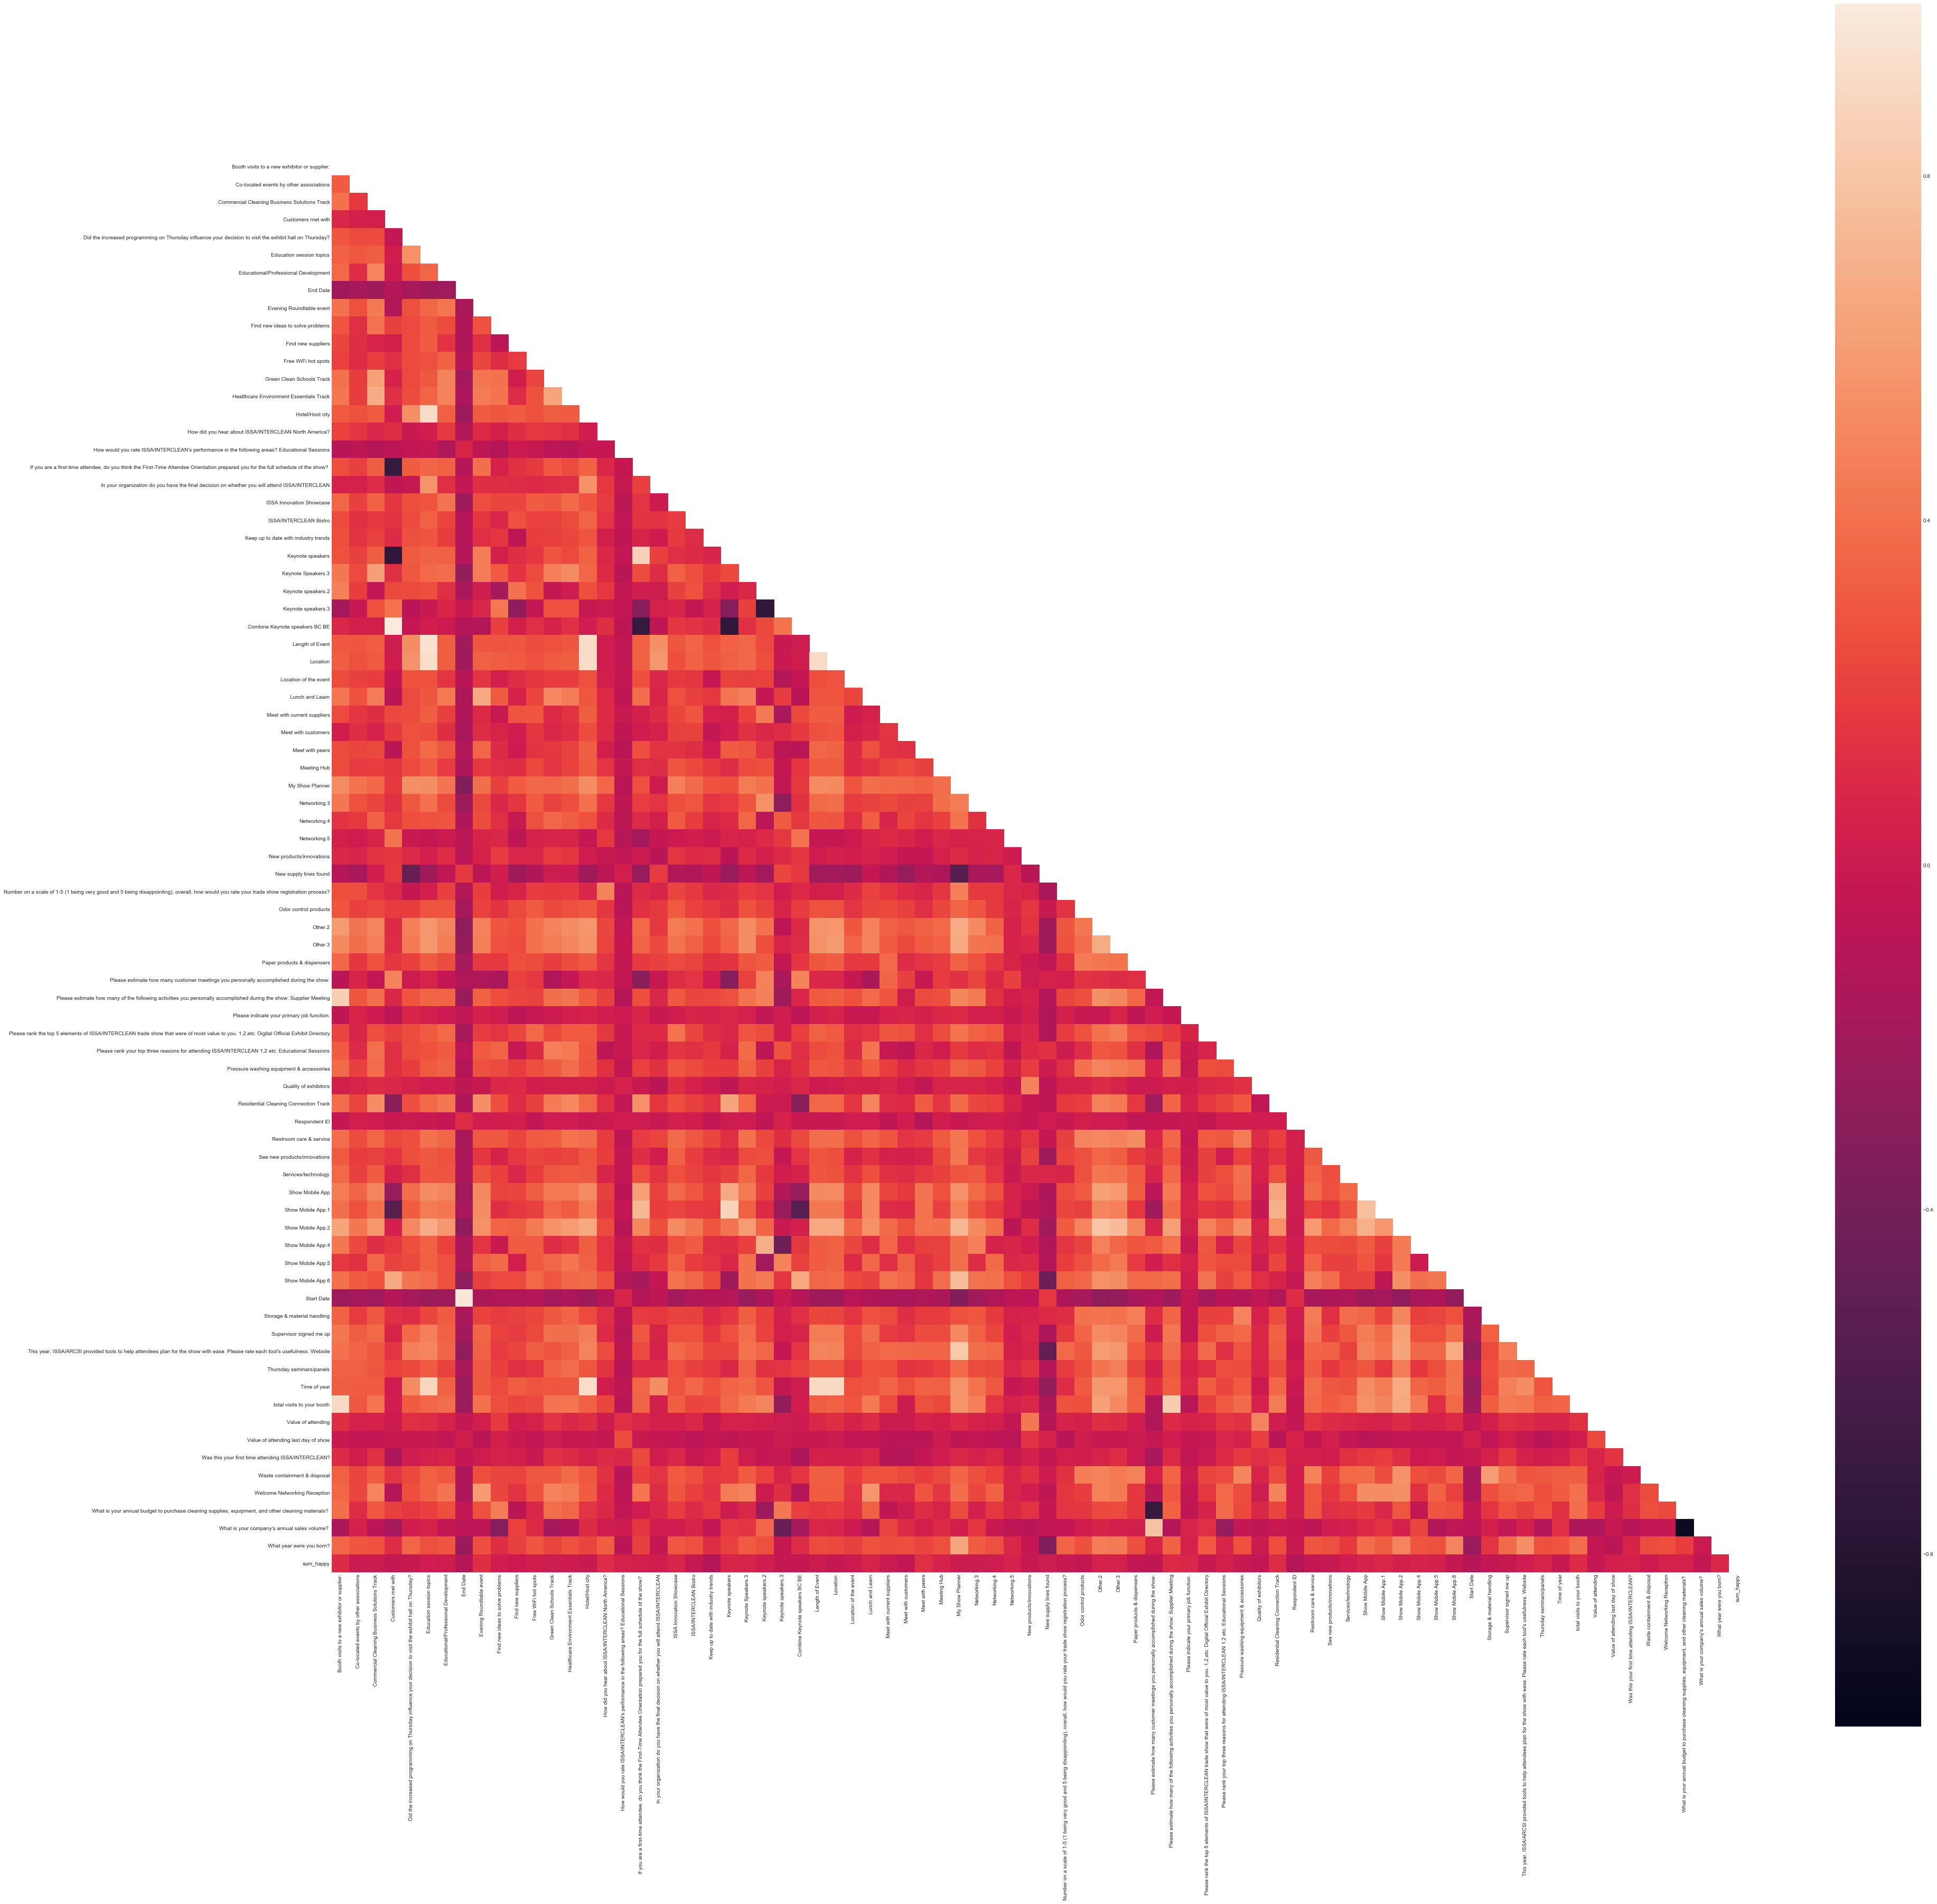

In [211]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [232]:
sum_pos = Z.loc[(Z['sum_happy']==3) | Z['sum_happy']==1]

In [233]:
sum_pos

,ARCSI Rountables,Booth visits to a new exhibitor or supplier:,Co-located events by other associations,Commercial Cleaning Business Solutions Track,Customers met with,Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?,Education session topics,Educational/Professional Development,End Date,Evening Roundtable event,...,total visits to your booth,Value of attending,Value of attending last day of show,Was this your first time attending ISSA/INTERCLEAN?,Waste containment & disposal,Welcome Networking Reception,"What is your annual budget to purchase cleaning supplies, equipment, and other cleaning materials?",What is your company's annual sales volume?,What year were you born?,sum_happy
1,7.356615e+16,7.000000e+00,7.356615e+16,7.356615e+16,2.000000e+00,1.0,2.0,7.356615e+16,1.508107e+18,7.356615e+16,...,5.000000e+01,1.0,2.0,2.0,1.400000e+01,7.356615e+16,1.000000e+00,7.356615e+16,16.0,1.0
2,6.283686e+16,1.000000e+01,3.000000e+00,6.283686e+16,1.000000e+00,2.0,1.0,6.283686e+16,1.508085e+18,6.283686e+16,...,5.000000e+01,1.0,1.0,2.0,1.400000e+01,6.283686e+16,6.283686e+16,2.000000e+00,39.0,1.0
3,6.556846e+16,1.000000e+01,6.556846e+16,6.556846e+16,1.000000e+00,2.0,1.0,6.556846e+16,1.508075e+18,6.556846e+16,...,5.000000e+01,1.0,0.0,1.0,6.556846e+16,6.556846e+16,2.000000e+00,6.556846e+16,10.0,1.0
4,6.417204e+16,4.000000e+01,6.417204e+16,6.417204e+16,1.000000e+00,2.0,3.0,6.417204e+16,1.508056e+18,6.417204e+16,...,4.000000e+01,2.0,4.0,1.0,6.417204e+16,6.417204e+16,6.417204e+16,4.000000e+00,25.0,2.0
5,5.912999e+16,1.500000e+01,3.000000e+00,5.912999e+16,2.000000e+00,1.0,1.0,5.000000e+00,1.507816e+18,5.000000e+00,...,4.000000e+01,3.0,4.0,2.0,5.912999e+16,2.000000e+00,5.912999e+16,1.000000e+00,24.0,1.0
7,6.853647e+16,6.853647e+16,6.853647e+16,6.853647e+16,3.000000e+00,2.0,5.0,6.853647e+16,1.507803e+18,6.853647e+16,...,6.853647e+16,4.0,0.0,2.0,6.853647e+16,6.853647e+16,6.853647e+16,1.000000e+00,29.0,2.0
9,6.701326e+16,6.701326e+16,5.000000e+00,6.701326e+16,1.000000e+00,1.0,3.0,6.701326e+16,1.507799e+18,6.701326e+16,...,6.701326e+16,1.0,0.0,2.0,6.701326e+16,6.701326e+16,6.701326e+16,2.000000e+00,22.0,1.0
10,6.555637e+16,8.000000e+00,6.555637e+16,6.555637e+16,3.000000e+00,2.0,3.0,6.555637e+16,1.507797e+18,6.555637e+16,...,1.200000e+02,2.0,4.0,2.0,6.555637e+16,6.555637e+16,6.555637e+16,1.000000e+00,30.0,1.0
11,6.154271e+16,1.000000e+02,3.000000e+00,6.154271e+16,1.000000e+00,2.0,1.0,6.154271e+16,1.507797e+18,6.154271e+16,...,1.300000e+02,1.0,0.0,2.0,1.400000e+01,6.154271e+16,5.000000e+00,6.154271e+16,28.0,2.0
12,7.013005e+16,7.013005e+16,5.000000e+00,7.013005e+16,2.000000e+00,2.0,1.0,7.013005e+16,1.507797e+18,7.013005e+16,...,7.013005e+16,2.0,2.0,2.0,7.013005e+16,7.013005e+16,7.013005e+16,6.000000e+00,23.0,1.0


In [234]:
corr = sum_pos.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:].corr()

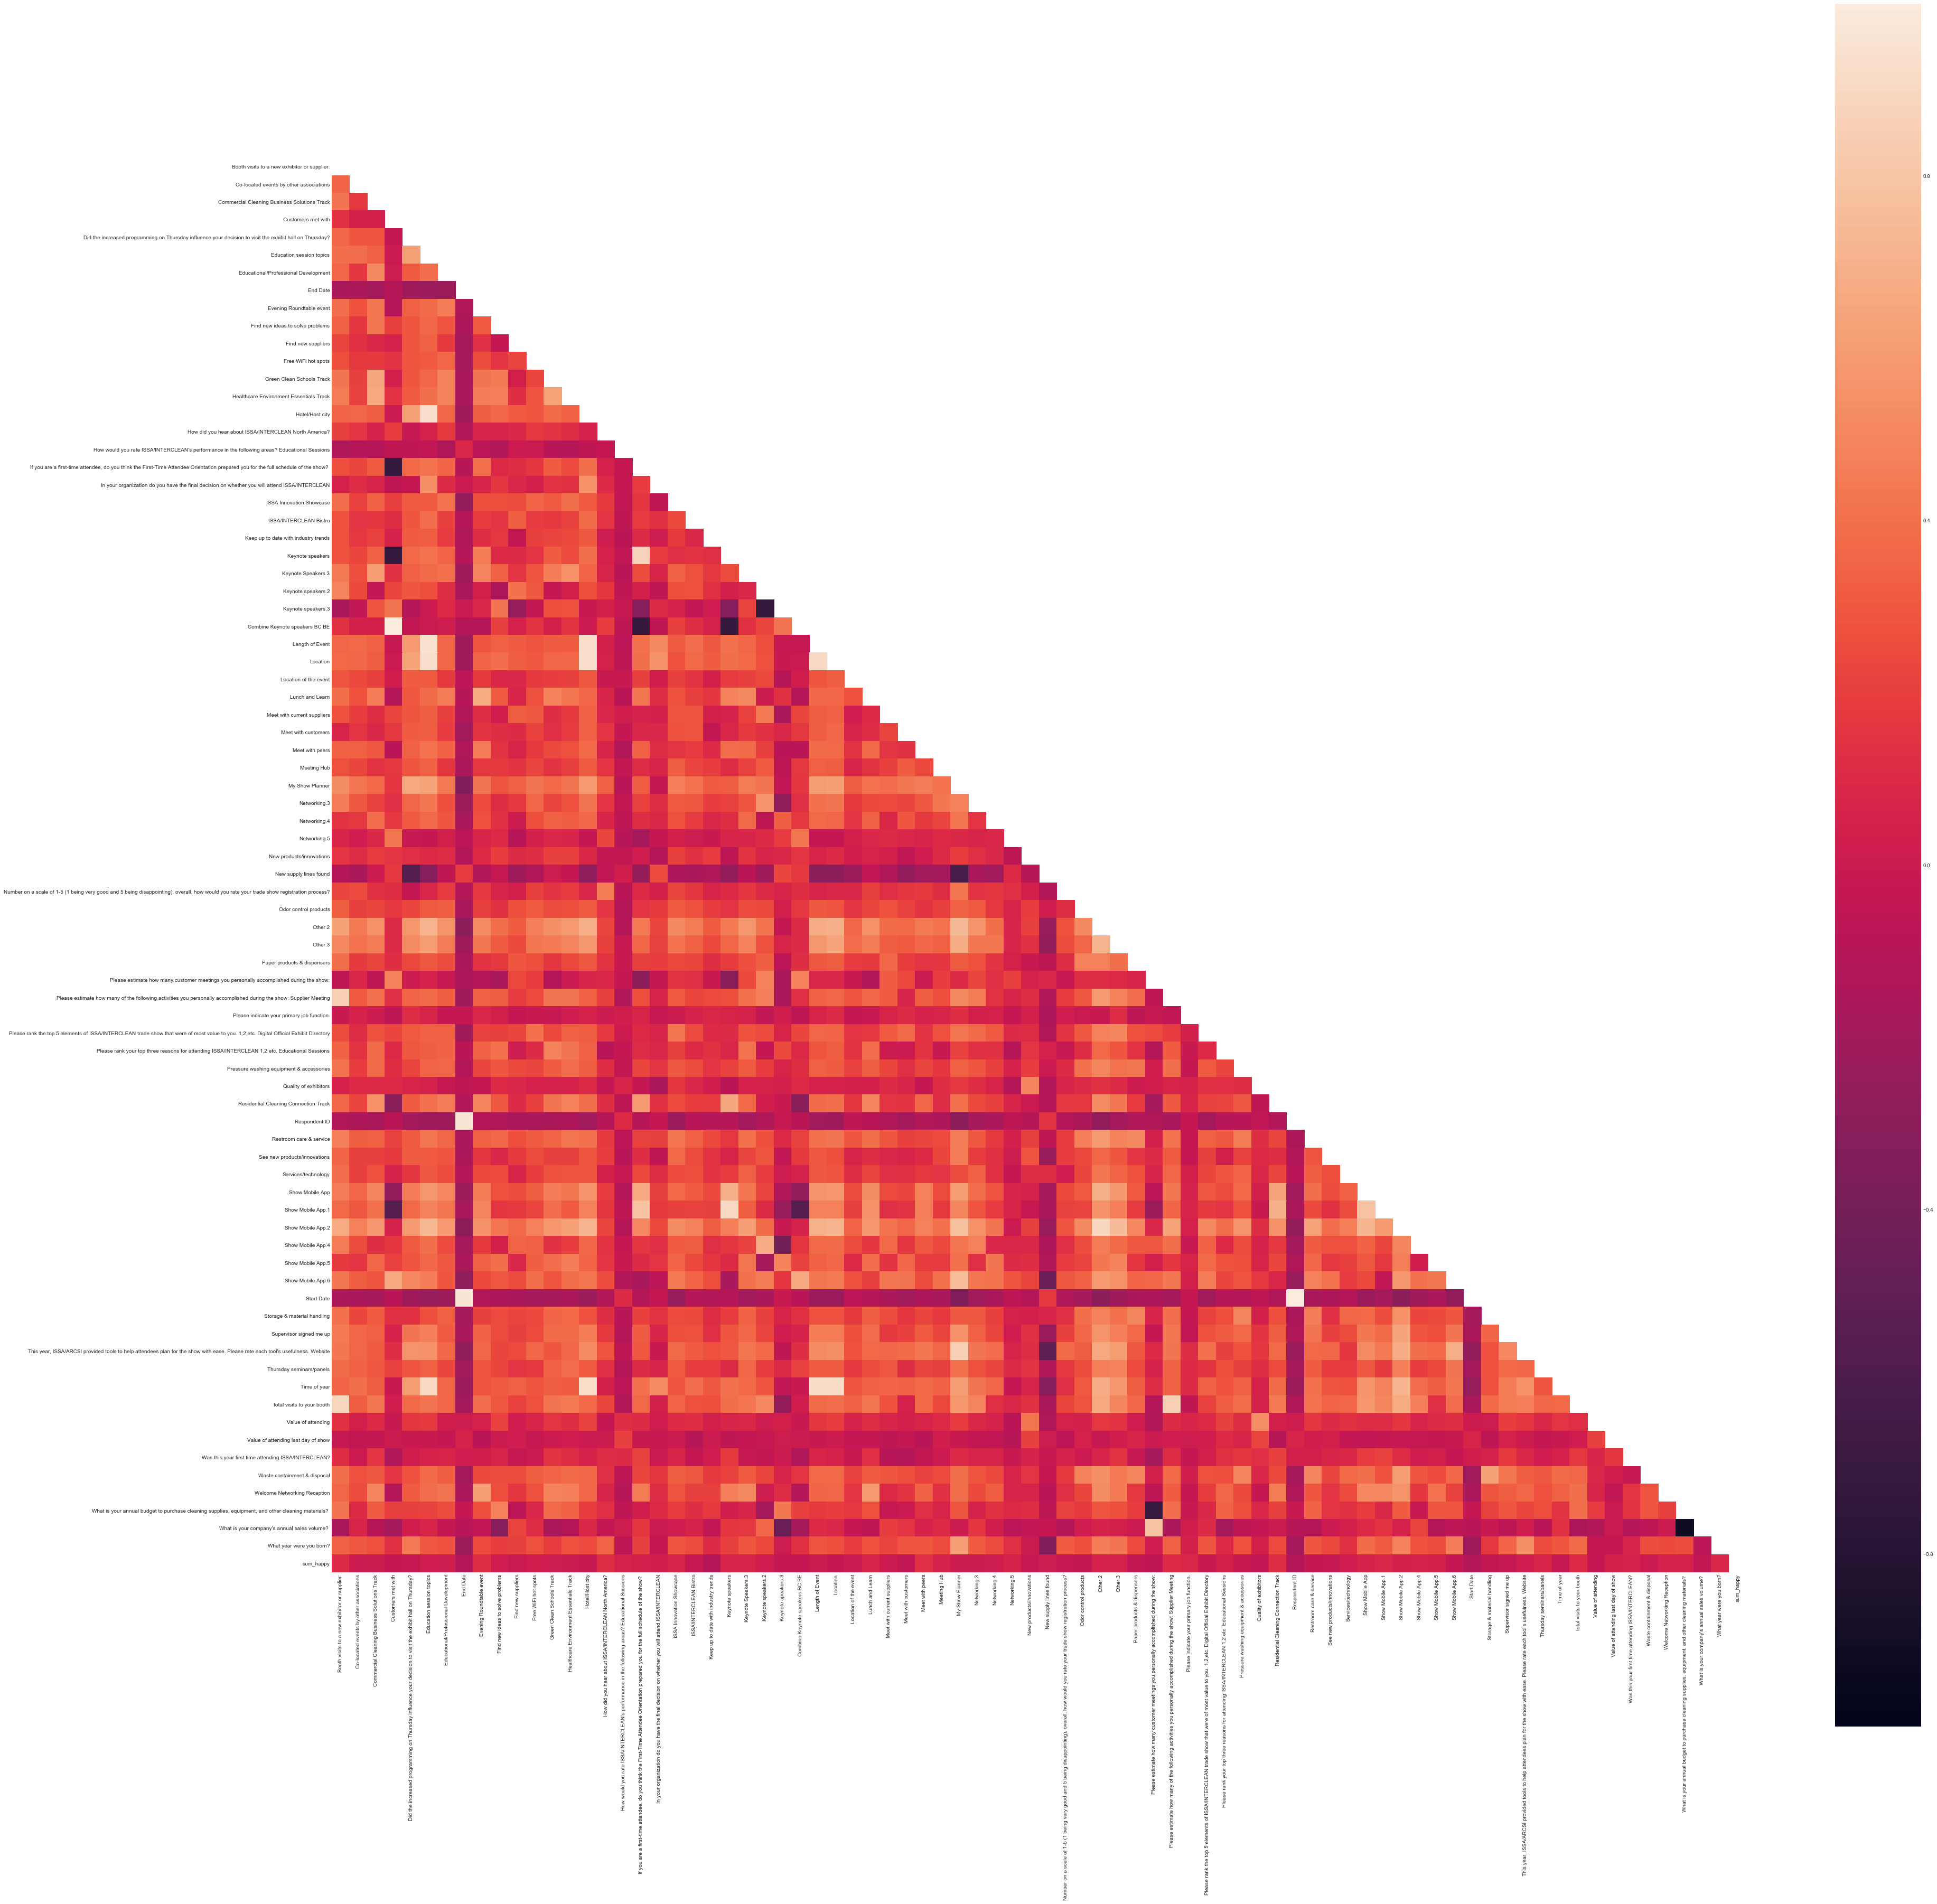

In [235]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [223]:
sum_neg = Z.loc[Z['sum_happy']==1]

In [224]:
corr = sum_neg.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:].corr()

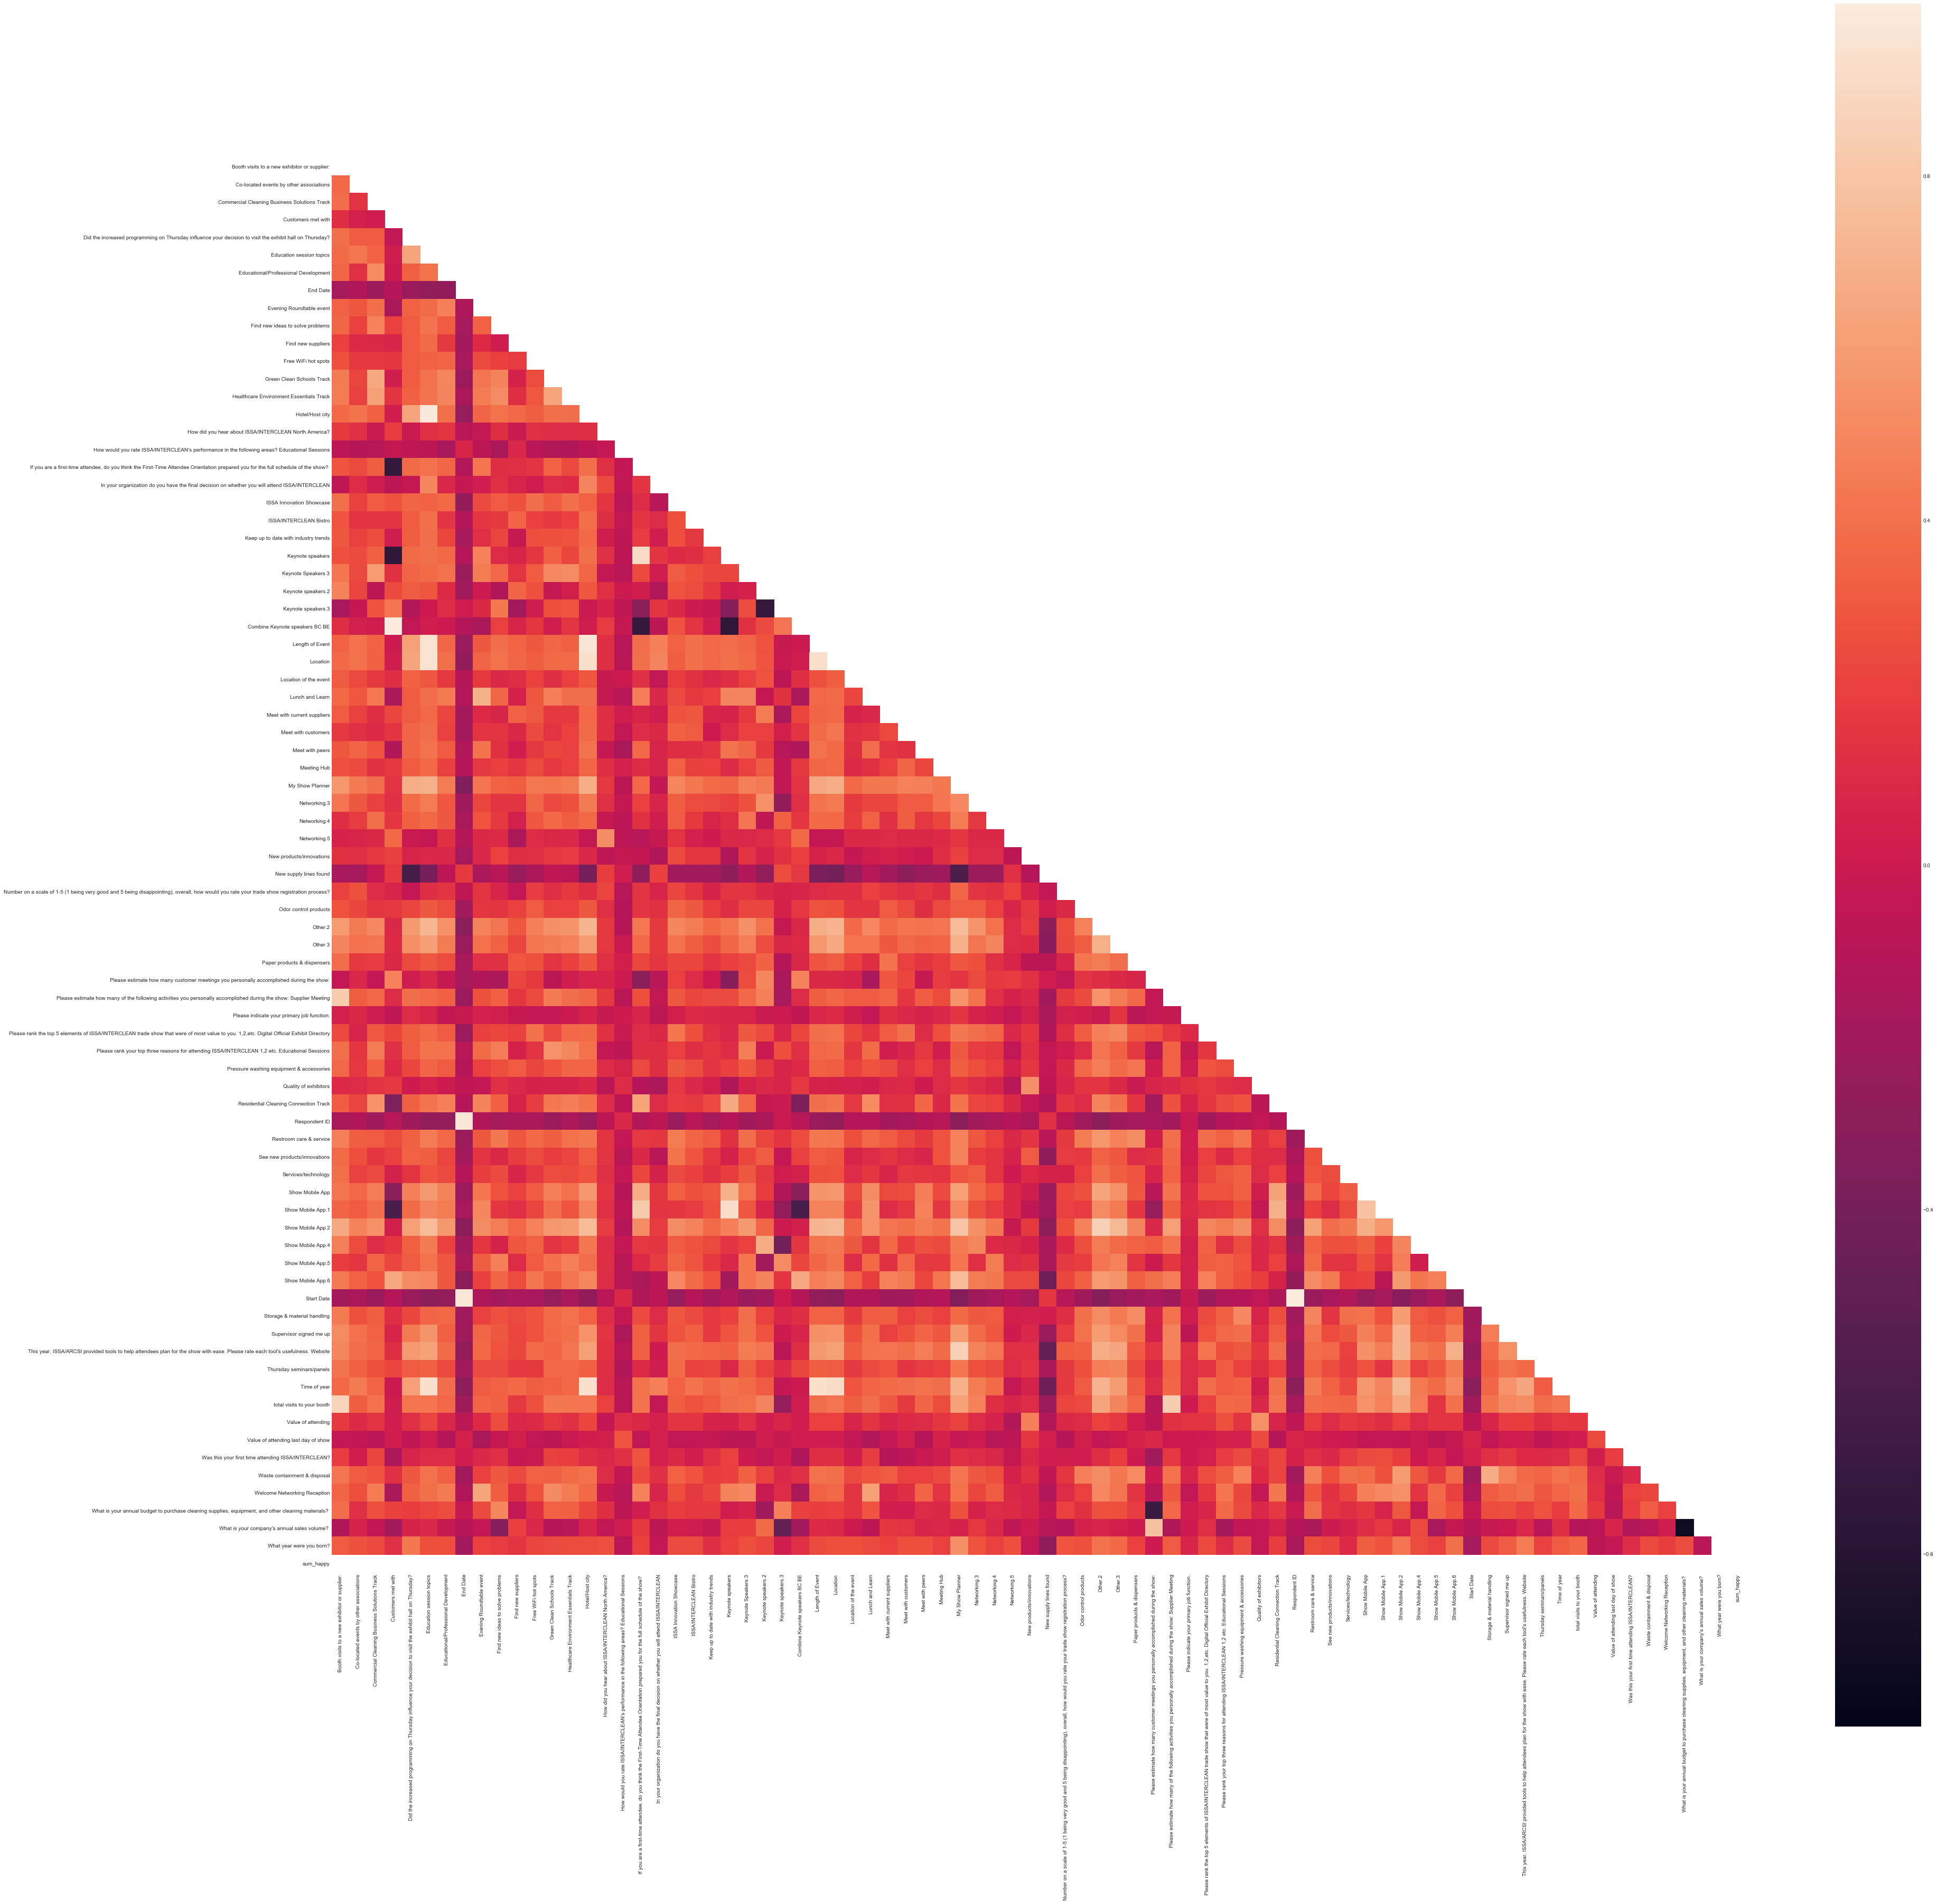

In [225]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [ ]:
estimator = xgb.XGBClassifier()
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


In [ ]:
estimator = RandomForestClassifier(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


In [ ]:
estimator = LogisticRegression(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [ ]:
estimator = AdaBoostClassifier(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [ ]:
fit.grid_scores_.sort()

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(fit.grid_scores_) + 1), fit.grid_scores_)
plt.figure(figsize=(150,150))
plt.show()

In [ ]:
model=[]
model = KNeighborsClassifier(n_neighbors = 3,)
kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
msg = cv_results.mean(), cv_results.std()
print(msg)


In [ ]:
for b in range(0,len(fit.ranking_)):
    if fit.ranking_[b] ==1:
        print b, X.columns[b]

In [ ]:
estimator = GradientBoostingClassifier(random_state = seed)
rfe = RFECV(estimator, cv= kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [ ]:
for a in range(1,11):
    for b in range(0,len(fit.ranking_)):
        if fit.ranking_[b] == a:
            print a, b, X.columns[b]

In [ ]:
butter = fit.grid_scores_.sort()


In [ ]:
fit.grid_scores_

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(fit.grid_scores_) + 1), fit.grid_scores_)
plt.figure(figsize=(150,150))
plt.show()

In [ ]:
X.columns

In [ ]:
print('Feature  Accuracy')
for i in range(n_feats):
    X = iris.data[:, i].reshape(-1, 1)
    scores = cross_val_score(clf, X, y)
    print('%d        %g' % (i, scores.mean()))

In [ ]:
model = KNeighborsClassifier()
the_list = []
the_column = []
rfe = RFE(model,1)
fit = rfe.fit(X,y)

    #print("Selected features: %s") % fit.support_
for a in range(1,8):
    for b in range(0,len(fit.ranking_)):
        if fit.ranking_[b] == a:
            print a, b, X.columns[b]

In [ ]:
rfe = RFE(model,1 )
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [ ]:
model = ExtraTreesClassifier(random_state = seed)
the_list = []
the_column = []
rfe = RFE(model,1)
fit = rfe.fit(X,y)
          
print("Selected features: %s") % fit.support_
for a in range(1,8):
    for b in range(0,len(fit.ranking_)):
        if fit.ranking_[b] == a:
            print a, b, X.columns[b]
print("Optimal number of features : %d" % fit.n_features_)
print("Feature Ranking: %s") % fit.ranking_   

In [ ]:
print("Optimal number of features : %d" % rfe.n_features_)

In [ ]:
print( rfe.ranking_)

In [ ]:
print( rfe.ranking_)

In [ ]:
model = KNeighborsClassifier()
the_list = []
the_column = []
fit = rfe.fit(X,y)
rfe = RFE(model,1)
    #print("Selected features: %s") % fit.support_
for a in range(1,8):
    for b in range(0,len(fit.ranking_)):
        if fit.ranking_[b] == a:
            print a, b, X.columns[b]

In [ ]:
models=[]
models.append(('LR', LogisticRegression(random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(random_state = seed))) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
#models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))
#models.append(('SVC', SVC(kernel = 'linear', probability = True, random_state = seed)))

In [ ]:
kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)

In [ ]:

def test_ensemble(elist,single_score):
    
    for l in range(0, len(elist)):
        model1=elist[l]
        for j in range((l+1), len(elist)):
            model2=elist[j]
            for k in range((j+1), len(elist)):
                model3=elist[k]
                estimators=[]
                estimators.append(model1)
                estimators.append(model2)
                estimators.append(model3)
                #try:
                    
                ensemble = VotingClassifier(estimators, voting='soft')
                cv_results = model_selection.cross_val_score(ensemble, X, y,scoring = None, cv=kfold) 
                if cv_results.mean() > single_score:
                    print estimators[0][0], estimators[1][0], estimators[2][0]
                    msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
                    print msg
                
                 
                
                #except:
                    #msg = " BREAK with: " + estimators[0][0], estimators[1][0],estimators[2][0]
                    #print msg
                    
           

In [ ]:
test_ensemble(models, 0.65)

In [ ]:
LDA ExtraTreesClassifier SVC

In [ ]:
estimators=[]
model1 = LinearDiscriminantAnalysis()
estimators.append(('LDA', model1))
model2 = ExtraTreesClassifier(random_state = seed)
estimators.append(('ExtraTreesClassifier', model2))
model3 = SVC(kernel = 'linear', probability = True, random_state = seed)
estimators.append(('SVC', model3))
ensemble = VotingClassifier(estimators, voting='soft')
ensemblefit = ensemble.fit(X,y)
rfe = RFE(ensemblefit,1)
fit = rfe.fit(X,y)
#kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
#cv_results = model_selection.cross_val_score(ensemble, X, y, cv=kfold, scoring= scoring) 
#msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
print( fit.ranking_)


In [ ]:
estimators = []
model1 = ExtraTreesClassifier(random_state = seed)
estimators.append(('ExtraTreesClassifier', model1))
model2 = KNeighborsClassifier()
estimators.append(('KNeighborsClassifier', model2))
model3 = GradientBoostingClassifier(random_state = seed)
estimators.append(('GradientBoostingClassifier', model3))


ensemble = VotingClassifier(estimators, voting='soft')
kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
cv_results = model_selection.cross_val_score(ensemble, X, y, cv=kfold, scoring= scoring) 
msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
print msg

In [ ]:
kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
estimators = []
model1 = ExtraTreesClassifier()
estimators.append(('ExtraTreesClassifier', model1))
model2 = KNeighborsClassifier()
estimators.append(('KNeighborsClassifier', model2))
model3 = GradientBoostingClassifier()
estimators.append(('GradientBoostingClassifier', model3))


ensemble = VotingClassifier(estimators, voting='soft')
cv_results = model_selection.cross_val_score(ensemble, X, y,scoring = scoring, cv=kfold) 
msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
print msg

In [ ]:
GradientBoostingClassifier(n_estimators= 32, learning_rate= 0.1, random_state= 7, max_depth= 3)

In [ ]:
param_grid = {'n_estimators': [10,20,30], 'learning_rate': [.1,.01,.001], 'random_state': [7], 'max_depth': [2,3,5,7]}
local_cv(GradientBoostingClassifier(), param_grid)

In [ ]:
def local_cv(model, params):                             #KFOLD WITH GRID SEARCH
    param_grid = params
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid_result = grid.fit(X, y)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    for params, mean_score, scores in grid_result.grid_scores_:
        print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

In [ ]:
Finding and recommendations,  The question you want to predict for, ask first in your survey, for optimal data collection